# Table of Contents:
1. [Library Imports](#li)
2. [Data Preparation](#dp)
3. [Method Comparison](#mc)
4. [K-Means](#km)
5. [Hierarchical](#h)
6. [DBSCAN](#d)
7. [UMAP](#u)

# 1. Library Imports
<a id='li'></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from utils2 import *
from utils1 import knn_imputer
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

# 2. Data Preparation
<a id='dp'></a>

#### Import the data

In [4]:
data = pd.read_csv('Data/New_Data/project_data_99_educ_perc.csv')

#### Encode categorical variables

In [5]:
data['relevance_criteria'] = data['relevance_criteria'].replace({'Priority': 2, 'Caution': 1, 'Unknown': 0})
data['gender'] = data['gender'].replace({'female': 0, 'male': 1})
data['education'] = data['education'].replace({'High School': 0, 'Degree': 1, 'BSc Degree': 2, 'MSc Degree': 3})
data.loc[data['returns'] > 0, 'returns'] = 1

#### Define metrics to study

In [6]:
demographic_metrics_all = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code', 'education', 'gender']
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor']

In [7]:
demographic = data[demographic_metrics_all]
demographic_selection = data[demographic_metrics]


#### Scale the data

In [8]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [9]:
dem_no_scl = demographic_selection.copy()
dem_st_scl = standard.fit_transform(demographic_selection)
dem_mm_scl = minmax.fit_transform(demographic_selection)
dem_rb_scl = robust.fit_transform(demographic_selection)

In [10]:
demographic_no_scl = demographic_selection.copy()
demographic_no_scl[demographic_metrics] = dem_no_scl

demographic_st_scl = demographic_selection.copy()
demographic_st_scl[demographic_metrics] = dem_st_scl

demographic_mm_scl = demographic_selection.copy()
demographic_mm_scl[demographic_metrics] = dem_mm_scl

demographic_rb_scl = demographic_selection.copy()
demographic_rb_scl[demographic_metrics] = dem_rb_scl

In [11]:
sample_original = demographic.sample(frac=0.2, random_state=1)
sample_no_scl = demographic_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = demographic_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = demographic_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = demographic_rb_scl.sample(frac=0.2, random_state=1)

# Clustering Method Comparison
<a id='mc'></a>

In [57]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)
hierarchical = AgglomerativeClustering(metric='euclidean')

### No Scale

In [ ]:
sample_no_scl.columns

In [ ]:
dem_no_r2_scores = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores

In [ ]:
plot_r2_scores(dem_no_r2_scores)

In [ ]:
dem_st_r2_scores = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores

In [ ]:
plot_r2_scores(dem_st_r2_scores)

In [ ]:
dem_mm_r2_scores = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores

In [ ]:
plot_r2_scores(dem_mm_r2_scores)

In [ ]:
dem_rb_r2_scores = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores

In [ ]:
plot_r2_scores(dem_rb_r2_scores)

# SEM ALGUMAS VARIAVEIS (flagged, relevance criteria)

In [ ]:
dem_no_r2_scores_s = get_r2_df(sample_no_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_no_r2_scores_s

In [ ]:
plot_r2_scores(dem_no_r2_scores_s)

In [ ]:
dem_st_r2_scores_s = get_r2_df(sample_st_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_st_r2_scores_s

In [ ]:
plot_r2_scores(dem_st_r2_scores_s)

In [ ]:
dem_mm_r2_scores_s = get_r2_df(sample_mm_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_mm_r2_scores_s

In [ ]:
plot_r2_scores(dem_mm_r2_scores_s)

In [ ]:
dem_rb_r2_scores_s = get_r2_df(sample_rb_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_rb_r2_scores_s

In [ ]:
plot_r2_scores(dem_rb_r2_scores_s)

In [ ]:
# Prefix the names of the columns
df_no_prefixed = dem_no_r2_scores.add_prefix("no_")
df_st_prefixed = dem_st_r2_scores.add_prefix("st_")
df_mm_prefixed = dem_mm_r2_scores.add_prefix("mm_")
df_rb_prefixed = dem_rb_r2_scores.add_prefix("rb_")

# Concatenate the dataframes
df_combined = pd.concat([df_no_prefixed, df_st_prefixed, df_mm_prefixed, df_rb_prefixed], axis=1)

# Filter ward and kmeans columns
filtered_columns = [col for col in df_combined.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered = df_combined[filtered_columns]
df_filtered

In [ ]:
plot_r2_scores(df_filtered)

In [ ]:
# Prefix the names of the columns
df_no_prefixed_s = dem_no_r2_scores_s.add_prefix("no_")
df_st_prefixed_s = dem_st_r2_scores_s.add_prefix("st_")
df_mm_prefixed_s = dem_mm_r2_scores_s.add_prefix("mm_")
df_rb_prefixed_s = dem_rb_r2_scores_s.add_prefix("rb_")

# Concatenate the dataframes
df_combined_s = pd.concat([df_no_prefixed_s, df_st_prefixed_s, df_mm_prefixed_s, df_rb_prefixed_s], axis=1)

# Filter ward and kmeans columns
filtered_columns_s = [col for col in df_combined_s.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered_s = df_combined_s[filtered_columns_s]
df_filtered_s

In [ ]:
df_filtered_s.columns

In [ ]:
plot_r2_scores(df_filtered_s)

In [ ]:
plot_r2_scores(df_filtered_s[['st_kmeans', 'st_ward', 'mm_kmeans', 'mm_ward',
       'rb_kmeans', 'rb_ward']])

In [ ]:
demographic

---

# 4. Clustering
<a id='cl'></a>

In the notebook, the cluster analysis is grouped by data inputs - no scaling, standard scaler, minmax scaler, robust scaler. In each group, *n* methods of clustering were used and they are presented in this order:
1. [KMeans](#km)
2. [Ward (Hierarchical)](#wh)
3. [DBScan](#dbs)

In the end, it was possible to identify groups that recurrently appeared in the clustering solutions, and based on this, *x* solutions were chosen to be further studied.

## 4.1. K-means <a id='km'></a>

In this section, the k-means algorithm was tested with the data inputs previously mentioned. For each of the data inputs inertia and silhuette plots were done in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#km-no)
2. [Standard Scaler](#km-st)
3. [MinMax Scaler](#km-mm)
4. [Robust Scaler](#km-rb)

### No Scaler <a id='km-no'></a>

#### Plot

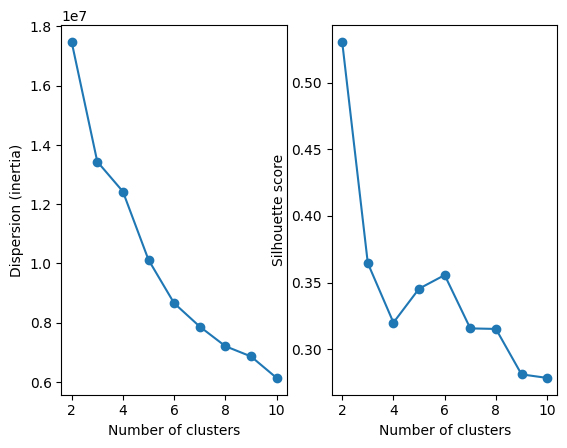

In [12]:
plot_inertia_and_silhouette(sample_no_scl, 2, 10)

#### Models

##### 3 clusters

In [22]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans3'] = kmeans.predict(sample_no_scl)

In [23]:
groupby_mean(sample_original, 'no_kmeans3', True)

# observations per cluster: [8303, 5744, 10379]


no_kmeans3,0,1,2
frequency_items,35.020000,40.520000,39.400000
potencial_score,29.740000,80.200000,0.730000
longevity_months,16.500000,16.530000,12.940000
relevance_criteria,1.930000,1.910000,1.920000
recency_in_weeks,15.140000,14.780000,15.640000
promotional_percentage,10.290000,12.800000,11.740000
returns,0.030000,0.070000,0.040000
flaged,0.010000,0.020000,0.010000
credit_factor,0.830000,0.800000,1.020000
zip_code,7.660000,7.680000,0.570000


##### 4 clusters

In [24]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans4'] = kmeans.predict(sample_no_scl)

In [25]:
groupby_mean(sample_original, 'no_kmeans4', True)

# observations per cluster: [1288, 9912, 5531, 7695]


no_kmeans4,0,1,2,3
frequency_items,38.110000,39.290000,40.490000,35.090000
potencial_score,28.000000,0.680000,80.200000,29.730000
longevity_months,15.950000,12.890000,16.480000,16.480000
relevance_criteria,2.000000,1.920000,1.910000,1.930000
recency_in_weeks,14.930000,15.660000,14.800000,15.160000
promotional_percentage,60.970000,9.330000,10.100000,7.010000
returns,0.250000,0.030000,0.050000,0.020000
flaged,0.000000,0.010000,0.020000,0.010000
credit_factor,1.000000,1.020000,0.800000,0.820000
zip_code,5.270000,0.540000,7.680000,7.670000


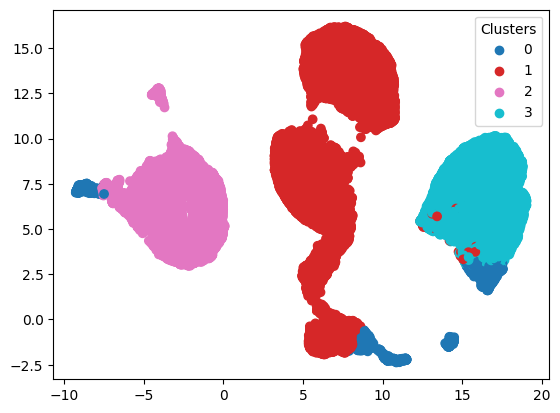

In [26]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['no_kmeans4'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_kmeans3')

In [ ]:
clusters_comparison(sample_original, 'no_kmeans6', 'no_kmeans4')

### Standard Scaler <a id='km-st'></a>

#### Plot

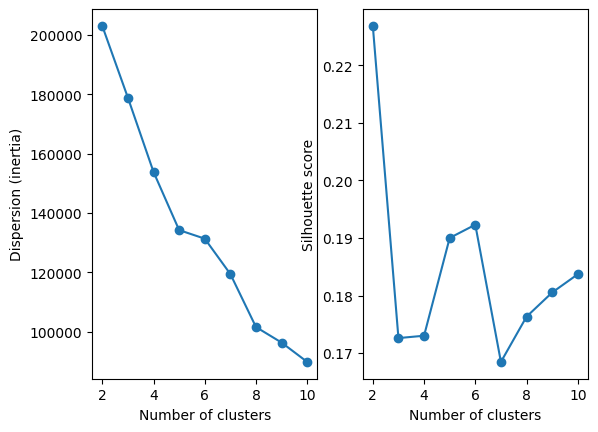

In [13]:
plot_inertia_and_silhouette(sample_st_scl, 2, 10)

#### Models

##### 5 clusters

In [27]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans5'] = kmeans.predict(sample_st_scl)

In [28]:
groupby_mean(sample_original, 'st_kmeans5', True)

# observations per cluster: [9034, 1272, 209, 12974, 937]


st_kmeans5,0,1,2,3,4
frequency_items,39.480000,38.780000,41.760000,37.060000,39.440000
potencial_score,56.050000,29.050000,47.880000,9.710000,38.250000
longevity_months,20.040000,15.020000,17.630000,11.350000,16.180000
relevance_criteria,2.000000,0.670000,1.230000,2.000000,1.950000
recency_in_weeks,14.390000,15.760000,13.570000,15.900000,14.720000
promotional_percentage,11.260000,0.150000,0.000000,11.510000,31.440000
returns,0.000000,0.010000,0.390000,0.000000,1.000000
flaged,0.000000,0.000000,1.000000,0.000000,0.000000
credit_factor,0.820000,0.630000,0.780000,0.990000,0.990000
zip_code,7.280000,4.430000,6.540000,2.780000,5.160000


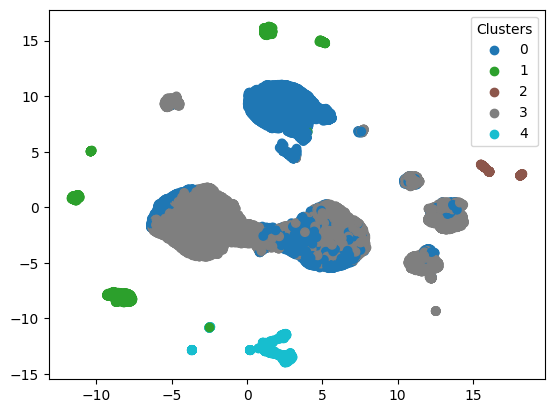

In [65]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['st_kmeans5'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_kmeans3')

In [ ]:
clusters_comparison(sample_original, 'st_kmeans7', 'st_kmeans4')

### MinMax Scaler <a id='km-mm'></a>

#### Plot

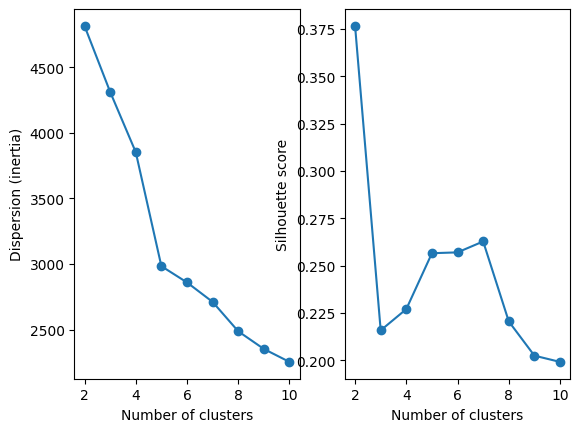

In [29]:
plot_inertia_and_silhouette(sample_mm_scl, 2, 10)

#### Models

##### 3 clusters

In [30]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans3'] = kmeans.predict(sample_mm_scl)

In [31]:
groupby_mean(sample_original, 'mm_kmeans3', True)

# observations per cluster: [1025, 18066, 5335]


mm_kmeans3,0,1,2
frequency_items,39.690000,37.400000,40.530000
potencial_score,39.260000,13.670000,80.220000
longevity_months,16.380000,14.480000,16.480000
relevance_criteria,1.880000,1.930000,1.920000
recency_in_weeks,14.570000,15.440000,14.840000
promotional_percentage,28.740000,10.550000,11.390000
returns,1.000000,0.000000,0.000000
flaged,0.080000,0.000000,0.010000
credit_factor,0.970000,0.930000,0.800000
zip_code,5.300000,3.720000,7.670000


promo+returns | general | score

##### 4 clusters

In [32]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans4'] = kmeans.predict(sample_mm_scl)

In [37]:
groupby_mean(sample_original, 'mm_kmeans4', True)

# observations per cluster: [1025, 5335, 10363, 7703]


mm_kmeans4,0,1,2,3
frequency_items,39.690000,40.530000,37.600000,37.130000
potencial_score,39.260000,80.220000,8.780000,20.250000
longevity_months,16.380000,16.480000,8.540000,22.460000
relevance_criteria,1.880000,1.920000,1.940000,1.910000
recency_in_weeks,14.570000,14.840000,15.640000,15.160000
promotional_percentage,28.740000,11.390000,11.790000,8.870000
returns,1.000000,0.000000,0.000000,0.000000
flaged,0.080000,0.010000,0.000000,0.010000
credit_factor,0.970000,0.800000,0.980000,0.860000
zip_code,5.300000,7.670000,2.490000,5.380000


promo+returns | score | lowscore | general

##### 5 clusters

In [34]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans5'] = kmeans.predict(sample_mm_scl)

In [35]:
groupby_mean(sample_original, 'mm_kmeans5', True)

# observations per cluster: [7246, 5243, 9807, 1105, 1025]


mm_kmeans5,0,1,2,3,4
frequency_items,37.130000,40.480000,37.480000,38.900000,39.690000
potencial_score,20.340000,80.210000,8.840000,18.400000,39.260000
longevity_months,22.500000,16.480000,8.510000,14.940000,16.380000
relevance_criteria,2.000000,1.950000,2.000000,0.630000,1.880000
recency_in_weeks,15.130000,14.830000,15.630000,15.680000,14.570000
promotional_percentage,9.480000,11.590000,12.420000,0.030000,28.740000
returns,0.000000,0.000000,0.000000,0.000000,1.000000
flaged,0.000000,0.010000,0.000000,0.050000,0.080000
credit_factor,0.880000,0.810000,1.000000,0.610000,0.970000
zip_code,5.420000,7.670000,2.500000,3.800000,5.300000


general | score | lowsocre+new+smart | nopromo+dumb | promo+returns

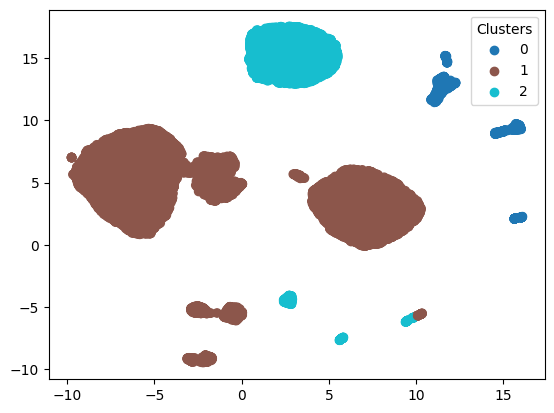

In [67]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_kmean3'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans4', 'mm_kmeans3')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_kmeans4')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans6', 'mm_kmeans5')

### Robust Scaler <a id='km-rb'></a>

#### Plot

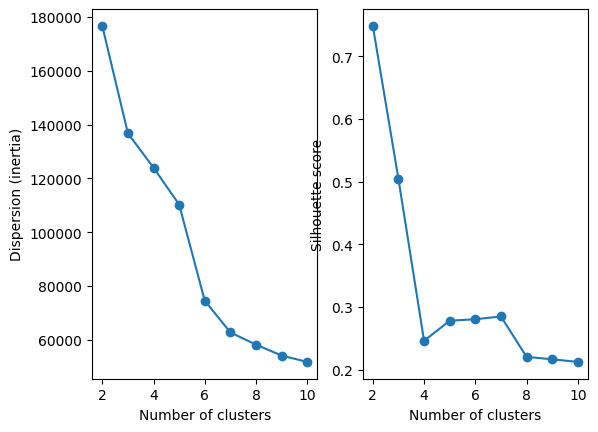

In [14]:
plot_inertia_and_silhouette(sample_rb_scl, 2, 10)

#### Models

##### 3 clusters

In [45]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans3'] = kmeans.predict(sample_rb_scl)

In [46]:
groupby_mean(sample_original, 'rb_kmeans3', True)

# observations per cluster: [2496, 21924, 6]


rb_kmeans3,0,1,2
frequency_items,38.250000,38.170000,37.170000
potencial_score,20.210000,30.320000,0.980000
longevity_months,13.550000,15.160000,14.500000
relevance_criteria,1.970000,1.920000,2.000000
recency_in_weeks,16.200000,15.160000,15.000000
promotional_percentage,22.660000,10.230000,0.000000
returns,0.040000,0.040000,0.000000
flaged,0.000000,0.010000,0.000000
credit_factor,2.720000,0.690000,27.700000
zip_code,3.190000,4.820000,0.000000


##### 5 clusters

In [60]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans4'] = kmeans.predict(sample_rb_scl)

In [62]:
groupby_mean(sample_original, 'rb_kmeans4', True)

# observations per cluster: [21845, 647, 1928, 6]


rb_kmeans4,0,1,2,3
frequency_items,38.170000,39.220000,37.900000,37.170000
potencial_score,30.320000,11.770000,23.400000,0.980000
longevity_months,15.150000,11.710000,14.310000,14.500000
relevance_criteria,1.920000,1.930000,1.980000,2.000000
recency_in_weeks,15.160000,16.680000,16.020000,15.000000
promotional_percentage,10.250000,23.090000,21.700000,0.000000
returns,0.040000,0.100000,0.020000,0.000000
flaged,0.010000,0.010000,0.000000,0.000000
credit_factor,0.690000,4.450000,2.100000,27.700000
zip_code,4.820000,1.760000,3.740000,0.000000


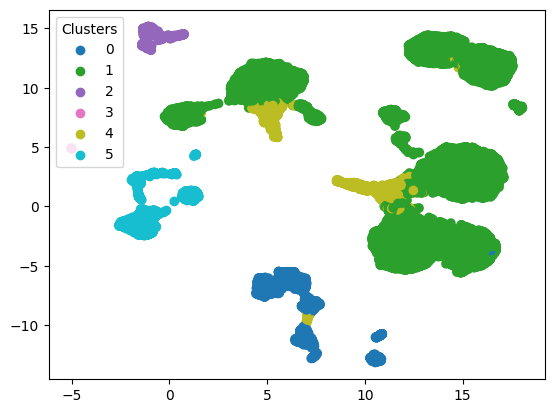

In [63]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_kmeans6'])

### Comparison

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans5', 'rb_kmeans3')

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_kmeans5')

## 4.2. Hierarchical (Ward) <a id='wh'></a>

In this section, the hierarchical algorithm with a ward linkeage method was tested with the data inputs previously mentioned. For each of the data inputs dendrograms were plotted in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#h-no)
2. [Standard Scaler](#h-st)
3. [MinMax Scaler](#h-mm)
4. [Robust Scaler](#h-rb)

In the end of this section there is also a result comparison between clustering techniques as well as scaling options.

5. [Inter Clustering Comparison](#icc)

### No Scaler <a id='h-no'></a>

#### Plot

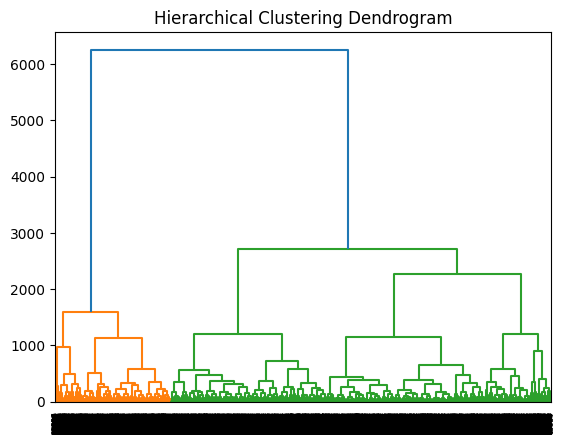

In [68]:
plot_dendrogram(sample_no_scl, 'ward')

#### Models

In [18]:
sample_original['no_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_no_scl)

In [ ]:
groupby_mean(sample_original, 'no_ward2', True, 12, 0)

score | general

##### 3 clusters

In [20]:
sample_original['no_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_no_scl)

In [ ]:
groupby_mean(sample_original, 'no_ward3', True, 12)

##### 5 clusters

In [24]:
sample_original['no_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_no_scl)

In [ ]:
groupby_mean(sample_original, 'no_ward4', True, 12, 0)

In [22]:
sample_original['no_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_no_scl)

In [ ]:
groupby_mean(sample_original, 'no_ward5', True, 12, 0)

normal | lowscore+nopromo? | score | promo | score+promo+return

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'no_ward3', 'no_ward2')

In [ ]:
clusters_comparison(sample_original, 'no_ward4', 'no_ward3')

In [ ]:
sample_no_scl

In [ ]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['no_ward3'])

### Standard Scaler <a id='h-st'></a>

#### Plot

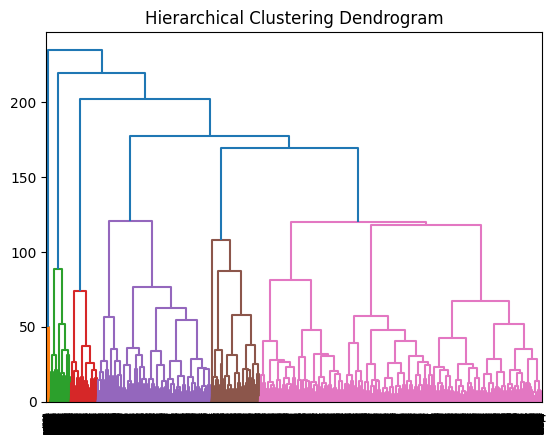

In [69]:
plot_dendrogram(sample_st_scl, 'ward')

#### Models

##### 3 clusters

In [33]:
sample_original['st_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_ward3', True)

general | nopromo | score

##### 4 clusters

In [35]:
sample_original['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_ward4', True, 12)

general | nopromo | score | promo+returns

##### 5 clusters

In [37]:
sample_original['st_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_ward5', True, 12)

general | antiques | score | promo | nopromo

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'st_ward6', 'st_ward3')

In [ ]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['st_ward4'])

### MinMax Scaler <a id='h-mm'></a>

#### Plot

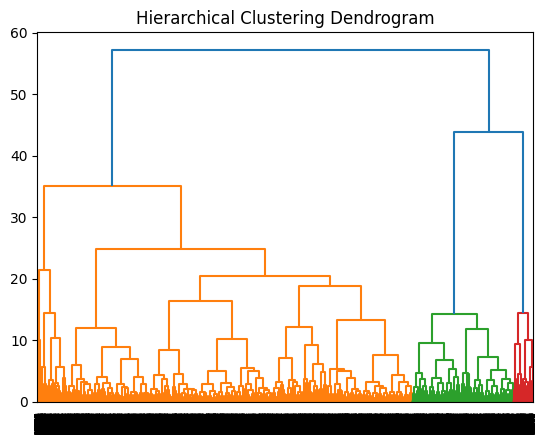

In [70]:
plot_dendrogram(sample_mm_scl, 'ward')

#### Models

##### 2 clusters

In [47]:
sample_original['mm_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_mm_scl)

In [ ]:
groupby_mean(sample_original, 'mm_ward2', True, 12)

general | score

##### 3 clusters

In [56]:
sample_original['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_mm_scl)

In [ ]:
groupby_mean(sample_original, 'mm_ward3', True, 12)

general | score | nopromo

##### 4 clusters

In [58]:
sample_original['mm_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_mm_scl)

In [ ]:
groupby_mean(sample_original, 'mm_ward4', True, 12)

general | new+pormo? | nopromo | score

In [53]:
sample_original['mm_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_mm_scl)

In [ ]:
groupby_mean(sample_original, 'mm_ward5', True, 12)

lowscore+promo | score | nopromo | general | antiques

In [54]:
sample_original['mm_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_mm_scl)

In [ ]:
groupby_mean(sample_original, 'mm_ward6', True, 12)

nopromo+lowrelevance | score | lowscore | general | antiques | promo

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_ward6'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'mm_ward3', 'mm_ward2')

In [ ]:
clusters_comparison(sample_original, 'mm_ward4', 'mm_ward3')

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_ward3'])

### Robust Scaler <a id='h-rb'></a>

#### Plot

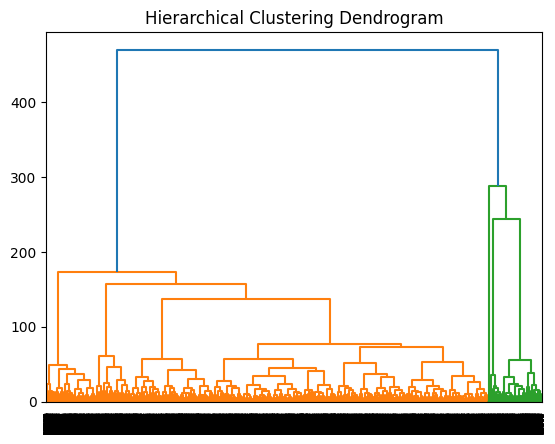

In [71]:
plot_dendrogram(sample_rb_scl, 'ward')

#### Models

##### 3 clusters

In [68]:
sample_original['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_rb_scl)

In [ ]:
groupby_mean(sample_original, 'rb_ward3', True, 12)

promo | general | score

##### 4 clusters

In [72]:
sample_original['rb_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_rb_scl)

In [ ]:
groupby_mean(sample_original, 'rb_ward4', True, 12)

##### 5 clusters

In [74]:
sample_original['rb_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_rb_scl)

In [ ]:
groupby_mean(sample_original, 'rb_ward5', True, 12)

##### 6 clusters

In [70]:
sample_original['rb_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_rb_scl)

In [ ]:
groupby_mean(sample_original, 'rb_ward6', True, 12)

longtimenosee | ? | score | promo+returns | freq+lowscore+ | ?

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_ward6'])

#### Comparison

### Inter clustering Comparison <a id='icc'></a>

#### Scaler Comparison
In this section it is possible understand that both **minmax** and **robust** scalers are the ones that presented more **consistent results**, in the sense that independently of the clustering method used (hierarchical with ward or kmeans), the clustering solutions were very similar and the observations belonging to the clusters formed also did not have a lot of variation.

The variations for the solutions built using the other scaling methods (unscaled data and standard scaler) was especially noticeable when the the clustering solution had more than 3 clusters.

##### No Scaler

In [ ]:
clusters_comparison(sample_original, 'no_kmeans3', 'no_ward3')

In [ ]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_ward4')

##### Standard Scaler

In [ ]:
clusters_comparison(sample_original, 'st_kmeans3', 'st_ward3')

In [ ]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_ward4')

##### MinMax Scaler

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans3', 'mm_ward3')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans4', 'mm_ward4')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_ward5')

##### Robust Scaler

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans3', 'rb_ward3')

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans4', 'rb_ward4')

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_ward6')

#### Method comparison
Here, the two scalers deemed to provide better clustering results were compared. It is possible to understand that their division process is quite different.

When analysing the previous sections of this notebook, it was possible to confirm this fact. A good example to understand this is the beer+watre+frozen cluster. While it is one of the first clusters to be differenciated when using minmax scaled data, this cluster only appears in the las division we tested (with 6 clusters) when using the robust scaled data.

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans3', 'rb_kmeans3')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans4', 'rb_kmeans4')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans5', 'rb_kmeans5')

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans6', 'rb_kmeans6')

## 4.3. DBScan <a id='dbs'></a>

This section aims to help define what would be the **best number of clusters** to consider for each of the data inputs as well as provide more possible clustering solutions. As previously mentioned, minmax and robust scaled data were the data inputs that remained for further analysis, therefore **DBScan** will only be tested for these cases.

For each input, a Kdist graph was plotted (to help find the right eps value). Then, **parameters were adjusted**, and clustering solutions created. These solutions were once again compared.

The data inputs were tested in the following order:
1. [MinMax Scaler](#dbs-mm)
4. [Robust Scaler](#dbs-rb)


### MinMax Scaler <a id='dbs-mm'></a>

#### Plot

In [ ]:
plot_kdist_graph(sample_mm_scl, demographic_metrics)

#### Models

##### 3 clusters

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
dbscan_n_clusters = len(np.unique(dbscan_labels))
sample_original['mm_dbs3'] = dbscan_labels

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'mm_dbs3', True)

outliers | beer+water+frozen | fresh+beverage+frozen+pastry | dairy

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs3'])

##### 4 clusters

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
dbscan_n_clusters = len(np.unique(dbscan_labels))
sample_original['mm_dbs4'] = dbscan_labels

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'mm_dbs4', True)

outliers | beer+water+frozen | fresh+beverage+frozen+pastry | dairy | pastry+wines+dairy

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs4'])

##### 5 clusters

In [ ]:
dbscan = DBSCAN(eps=0.09, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
sample_original['mm_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'mm_dbs5', True)

outliers | beer+water+frozen | fresh+beverage+frozen | pastry+fresh+beverage | pastry+dairy | dairy

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs5'])

##### 6 clusters

In [ ]:
dbscan = DBSCAN(eps=0.085, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
sample_original['mm_dbs6'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'mm_dbs6', True)

outliers | beer+water+frozen | fresh+beverage+frozen | fresh+beverage+pastry | pastry | dairy | pastry+wines+dairy

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs6'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'mm_dbs4', 'mm_dbs3')

In [ ]:
clusters_comparison(sample_original, 'mm_dbs5', 'mm_dbs4')

In [ ]:
clusters_comparison(sample_original, 'mm_dbs6', 'mm_dbs5')

### Robust Scaler <a id='dbs-rb'></a>

#### Plot

In [ ]:
plot_kdist_graph(sample_rb_scl, demographic_metrics_selection1)

#### Models

##### 3 clusters

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs3'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'rb_dbs3', True)

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_dbs3'])

##### 5 clusters

In [ ]:
dbscan = DBSCAN(eps=1.22, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'rb_dbs5', True)

outliers | beer+water+frozen | fresh+beverage+frozen | pastry+fresh+frozen | dairy | veggies+wines+dairy

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_dbs5'])

##### 6 clusters

In [ ]:
dbscan = DBSCAN(eps=1.03, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs6'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

In [ ]:
groupby_mean(sample_original, 'rb_dbs6', True)

beer+water+frozen | fresh+beverage+frozen | pastry+fresh+beverage | dairy | pastry+dairy | veggies+dairy

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'rb_dbs5', 'rb_dbs3')

In [ ]:
clusters_comparison(sample_original, 'rb_dbs6', 'rb_dbs5')

### Conclusions <a id='conc'></a>

Based on the results obtained through DBScan, clustering solutions with 4 and 6 clusters were eliminated from further analysis. This happens as clusterings with 6 clusters presented high percentages of outliers (>10%) and as a solution with 4 clusters was not found for the robust scaled data. 

Having said this, it was decided to compare the until now found solutions with minmax and robust scaled data and 3 or 5 clusters.

| Method | Scaler | # Clusters | bwf | fbfp | fbf | pfb | d | dp | dpvw | dvw | s | g | note |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| kmeans | minmax | 3 | x | x |  |  |  | x |  | | | |  |
| kmeans | robust | 3 |  |  |  | x |  |  |  |  | x | x | disregarded |
| ward | minmax | 3 | x | x |  |  |  | x |  |  |  |  |  |
| ward | robust | 3 |  |  |  | x |  |  |  |  | x | x | disregarded |
| dbscan | minmax | 3 | x | x |  |  | x |  |  |  |  |  |  |
| dbscan | robust | 3 |  |  |  | x | x |  |  | | | x | disregarded |
| kmeans | minmax | 5 | x |  | x | x | x |  | x | | | |  |
| kmeans | robust | 5 |  |  |  | x | x |  |  | x | x | x | disregarded |
| ward | minmax | 5 | x |  | x | x |  | x | x |  |  |  |  |
| dbscan | minmax | 5 | x |  | x | x | x | x |  |  |  |  |  |
| dbscan | robust | 5 | x |  | x | x | x |  | x | | | |  |


- bwf -> beer+water+frozen
- fbfp -> fresh+beverage+frozen+pastry
- fbf -> fresh+beverage+frozen
- pfb -> pastry+fresh+beverage
- d -> dairy
- dp -> dairy+pastry
- dpvw -> dairy+pastry+veggies+wine
- dvw -> dairy+veggies+wine
- s -> spenders
- g -> general


With this analysis it was concluded that a best solution for **3 clusters** would include: 
- beer+water+frozen
- fresh+beverage+frozen+pastry
- dairy+pastry

(this is the case of kmeans with minmax scaler)

And a best solution for **5 clusters** would include:
-  beer+water+frozen
- fresh+beverage+frozen
- pastry+fresh+beverage
- dairy
- dairy+pastry+veggies+wine

(this is the case for kmeans with minmax scaler and dbscan with robust scaler)

# Batota UMAP

In [15]:
umap_object = umap.UMAP(random_state=1)

In [16]:
umap_embedding_no = umap_object.fit_transform(sample_no_scl)
umap_embedding_st = umap_object.fit_transform(sample_st_scl)
umap_embedding_mm = umap_object.fit_transform(sample_mm_scl)
umap_embedding_rb = umap_object.fit_transform(sample_rb_scl)

In [17]:
sample_original['constant'] = 1

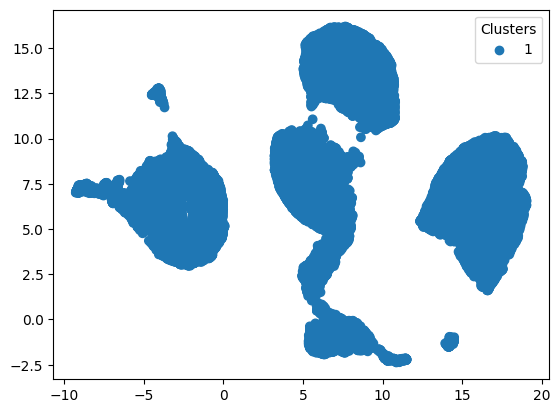

In [18]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['constant'])

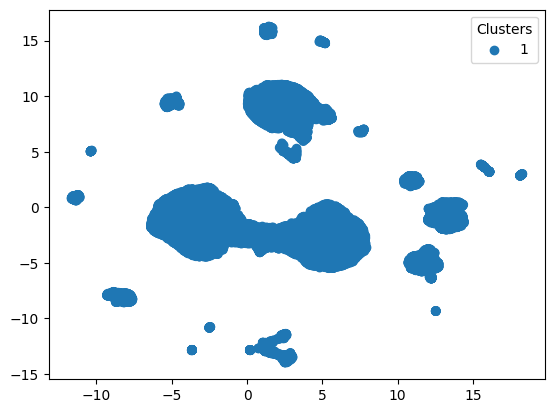

In [19]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['constant'])

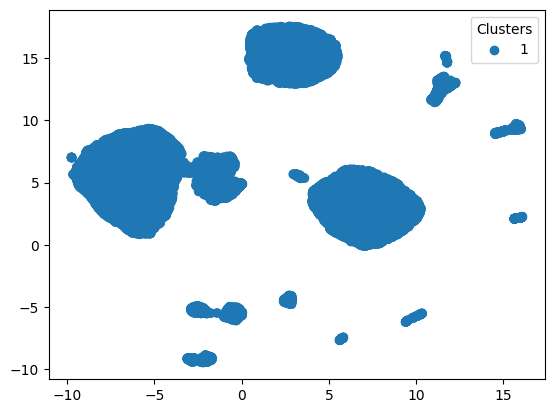

In [20]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['constant'])

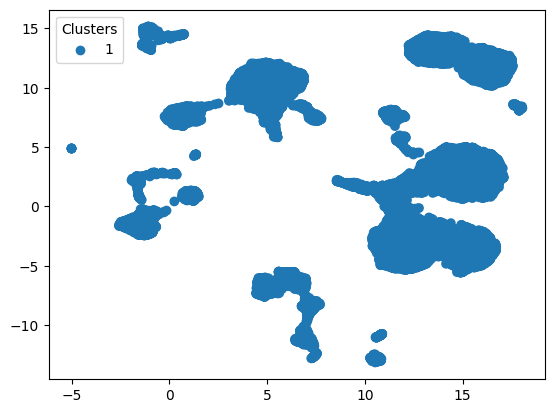

In [21]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['constant'])